# 1. Install package

In [1]:
# %pip install pypandoc
# %pip install underthesea
# %pip install sentence_transformers
# %pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
%pip install seaborn
%pip install tensorflow
# !pip uninstall -y keras
%pip install keras
%pip install transformers
%pip install itertools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: D:\jupyter_proj\venv\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: D:\jupyter_proj\venv\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: D:\jupyter_proj\venv\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: D:\jupyter_proj\venv\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: D:\jupyter_proj\venv\Scripts\python.exe -m pip install --upgrade pip


# 2. Import package

In [2]:
# import cudf, cuml
import pickle
from transformers import GPT2Tokenizer
import asyncio
import base64
import decimal
import json
from datetime import datetime, date
import os
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
import flask
# import pymysql
import requests
from flask import Flask, render_template, request
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.svm import LinearSVC, SVC
# from cuml.svm import SVC, LinearSVC
# from sklearn import tree
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, roc_curve, auc,  confusion_matrix, recall_score, precision_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay, auc
from sklearn.multiclass import OneVsRestClassifier
import openpyxl
import pandas as pd
import numpy as np
import preprocess_kgptalkie as ps
import re
import glob
import os
from underthesea import sentiment, pos_tag, word_tokenize
from flask import g
from sklearn.pipeline import Pipeline
import underthesea
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from pandas.errors import ParserError
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import os.path
import pypandoc

import seaborn as sns

import tensorflow as tf
import keras
from keras import layers

from itertools import cycle

D:\jupyter_proj\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\jupyter_proj\venv\Lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


# 3. Functions collect data from source

In [3]:
SIZE_DEMO = 20000

root = '/dataset/**/'
root2 = '/sentiment_transformer/other_dataset/'


# print(all_files)


def get_stopwords_list(stop_file_path):
    """load stop words """

    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))


stopwords_path = "vietnamese.txt"
stopwords = get_stopwords_list(stopwords_path)


def load_transformer_model():
    print(os.path.isdir("model"))
    if not os.path.isdir("model"):
        model = SentenceTransformer('keepitreal/vietnamese-sbert')
        model.save("model")
        return model
    return SentenceTransformer('model')


def get_clean(x):
#     print(x)
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    # x = str(x).lower()
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    # x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x


def load_data_train_to_excel(root):
    data_train = pd.DataFrame()
    all_files_train = glob.glob(root + "train/**/*.txt", recursive=True)
    for f in all_files_train:
        df = pd.read_csv(f, header=None, sep=' ', names=['Review', 'Sentiment'], on_bad_lines='skip')
        with open(f, mode='r', encoding="utf8") as f:
            df['Review'] = get_clean(f.read())
            df['Sentiment'] = ""
        data_train = pd.concat([data_train, df], ignore_index=True)
        # print(data)
    data_train.to_csv('data_train.csv', index=False)


def remove_stop_words(corpus, stop_words):
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))

    return results


def load_data_test_to_excel(root):
    data_test = pd.DataFrame()
    sentiment_array = ["negative", "positive", "neutral"]
    all_files_test = []
    for i in [-1, 1, 2]:
        all_files_test = glob.glob(f'{root}test/{i}/*.txt', recursive=True)
        print(i)
        for f in all_files_test:
            df = pd.read_csv(f, header=None, sep=' ', names=['Review', 'Sentiment'], on_bad_lines='skip',
                             quoting=csv.QUOTE_NONE)
            with open(f, mode='r', encoding="utf8") as f:
                df['Review'] = get_clean(f.read())
                df['Sentiment'] = sentiment_array[(i + 1) if i == -1 else i]
            data_test = pd.concat([data_test, df], ignore_index=True)
            # print(data_test
    data_test.to_csv('data_test.csv', index=False)


def load_data_test_to_excel2(root):
    data_test = pd.DataFrame()
    sentiment_array = ["nv_tot", "nv_xau", "shop_tot", "shop_xau", "sp_tot", "sp_xau"]
    all_files_test = []
    for i in sentiment_array:
        all_files_test = glob.glob(f'{root}{i}/*.txt', recursive=True)
        print(i)
        for f in all_files_test:
            df = pd.read_csv(f, header=None, sep=' ', names=['Review', 'Sentiment'], on_bad_lines='skip',
                             quoting=csv.QUOTE_NONE)
            with open(f, mode='r', encoding="utf8") as f:
                df['Review'] = get_clean(f.read())
                df['Sentiment'] = i
            data_test = pd.concat([data_test, df], ignore_index=True)
            # print(data_test
    data_test.to_csv('data_test2.csv', index=False)


def convert_docx_to_txt(root):
    # data_test = pd.DataFrame()
    sentiment_array = ["nv_tot", "nv_xau", "shop_tot", "shop_xau", "sp_tot", "sp_xau"]
    all_files_test = []
    for i in sentiment_array:
        all_files_test = glob.glob(f'{root}{i}/*.docx', recursive=True)
        # print(i)
        for f in all_files_test:
            docxFilename = f'{root}{i}/{Path(f).stem}{Path(f).suffix}'
            output = pypandoc.convert_file(docxFilename, 'plain', outputfile=f'{root}{i}/{Path(f).stem}.txt')
            os.remove(f'{root}{i}/{Path(f).stem}{Path(f).suffix}')
            # with open(f, mode='r', encoding="utf8") as f:
            #     df['Review'] = get_clean(f.read())
            #     df['Sentiment'] = i
            # data_test = pd.concat([data_test, df], ignore_index=True)
            # print(data_test
    # data_test.to_csv('data_test2.csv', index=False)


# convert_docx_to_txt(root2)

# load_data_train_to_excel(root)
# load_data_test_to_excel(root)
# load_data_test_to_excel2(root2)


def get_clean_slang_misspell(x):
    for idx, row in df_misspell.iterrows():
        if row['wrong'] in x:
            x = x.replace(row['wrong'], row['right'])

    for idx, row in df_slang_word.iterrows():
        if row['Slangs'] in x:
            x = x.replace(row['Slangs'], row['Values'])
    
    for idx, row in df_slang.iterrows():
        if row['Slangs'] in x:
            x = x.replace(row['Slangs'], row['Values'])

    return x

# 4. Read Data

In [4]:
df = pd.read_csv('data.csv')
df.drop_duplicates(subset='Review', keep="first", inplace=True)
df_slang = pd.read_csv('sentences.csv', skipinitialspace=True, usecols=['Slangs', 'Values'])
df_slang_word = pd.read_csv('words.csv', skipinitialspace=True, usecols=['Slangs', 'Values'])
df_misspell = pd.read_csv('dataset.csv', skipinitialspace=True, usecols=['stt', 'wrong', 'right'])
df

,Sentiment,Review,label,num_character,num_of_word,num_sentences
0,nv_tot,Nhân viên luôn nhiệt tình và thân thiện với kh...,0,55,12,1
1,nv_tot,Tôi thực sự ấn tượng với sự chuyên nghiệp của ...,0,62,15,1
2,nv_tot,Tôi thực sự ấn tượng với sự chuyên nghiệp của ...,0,65,15,1
3,nv_tot,Nhân viên rất nhiệt tình và thân thiện với mọi...,0,62,14,1
4,nv_tot,Dịch vụ tuyệt vời và nhân viên luôn sẵn sàng g...,0,70,17,1
...,...,...,...,...,...,...
1232,sp_xau,"""Dây đeo rất cứng và thô, đeo vào tay cảm thấy...",5,65,17,1
1233,sp_xau,""" chất lượng sản phẩm tuyệt vời . thời gian gi...",5,122,32,3
1234,sp_xau,""" lon nào cũng bị mốp vỏ hết ""\n",5,31,9,1
1235,sp_xau,"""Chưa lột sạch mụn hẳn ""\n",5,25,7,1


In [5]:
CLASS_NAMES = list(df["Sentiment"].unique())
CLASS_NAMES

['nv_tot', 'nv_xau', 'shop_tot', 'shop_xau', 'sp_tot', 'sp_xau']

# 5. Data preprocessing

In [6]:
df['Review'] = df['Review'].map(get_clean)

df['Review'] = df['Review'].map(get_clean_slang_misspell)


D:\jupyter_proj\venv\Lib\site-packages\preprocess_kgptalkie\utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


# 6. EDA

## 6.1 Distribution of Sentiment

In [7]:
df['Sentiment'].value_counts()

Sentiment
sp_tot      425
sp_xau      267
shop_tot    152
shop_xau    119
nv_xau      102
nv_tot       51
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1597a86f0d0>,
 [Text(0.4022868338109557, 1.0237994448828134, 'sp_tot'),
  Text(-1.0999956412997425, -0.0030966306800321096, 'sp_xau'),
  Text(-0.41665673061351954, -1.018035936907167, 'shop_tot'),
  Text(0.4022869057022213, -1.023799416634202, 'shop_xau'),
  Text(0.9235482297176578, -0.5975438623108605, 'nv_xau'),
  Text(1.088683085114632, -0.15738214697127265, 'nv_tot')],
 [Text(0.21942918207870307, 0.5584360608451708, '38.08'),
  Text(-0.5999976225271322, -0.001689071280017514, '23.92'),
  Text(-0.22726730760737426, -0.5552923292220909, '13.62'),
  Text(0.2194292212921207, -0.5584360454368373, '10.66'),
  Text(0.5037535798459951, -0.32593301580592393, '9.14'),
  Text(0.5938271373352537, -0.08584480743887597, '4.57')])

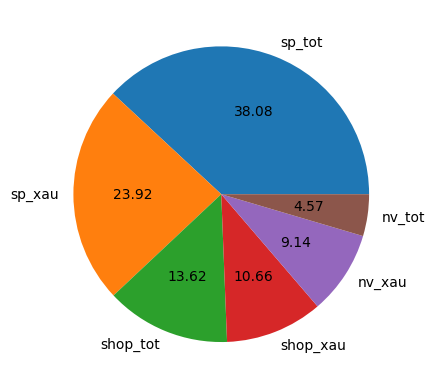

In [8]:
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%0.2f')

## 6.2. Distribution of num character for each sentiment

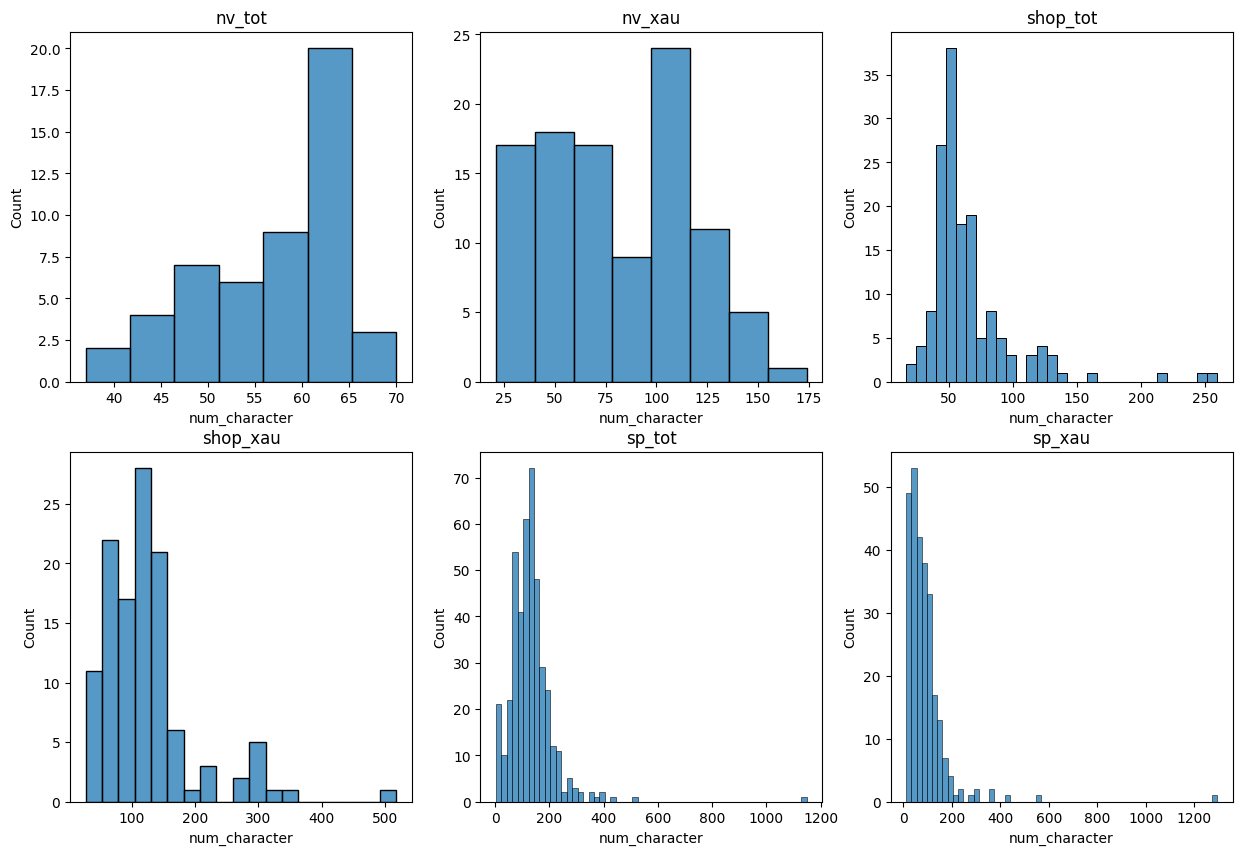

In [9]:
plt.figure(figsize=(15, 10))
# df_pd = df.to_pandas()
for i in range(len(CLASS_NAMES)):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df[df['Sentiment']==CLASS_NAMES[i]], x="num_character")
    plt.title(CLASS_NAMES[i])

<Figure size 1500x500 with 0 Axes>

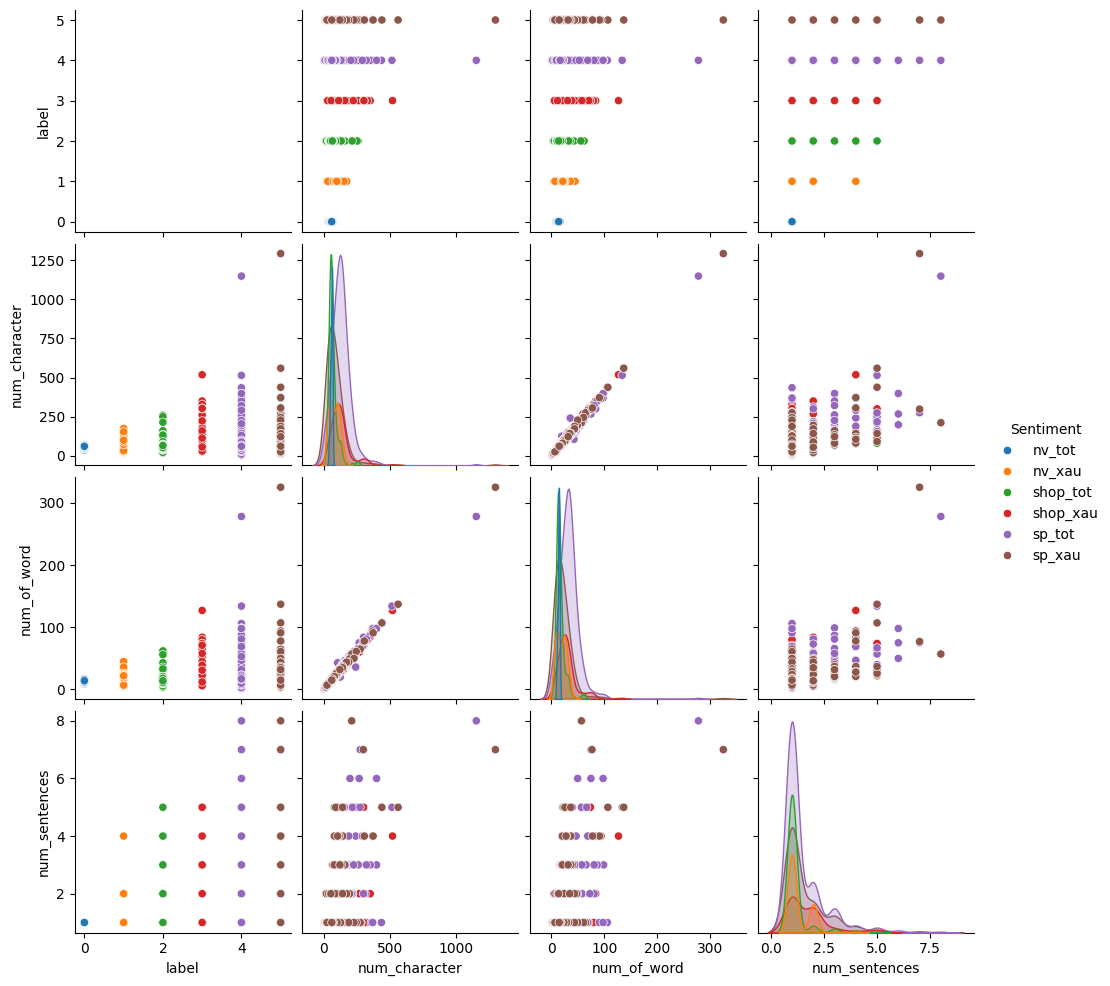

In [10]:
plt.figure(figsize=[15,5])
sns.pairplot(df, hue='Sentiment')

# 7. Tokenizer

In [11]:
docs = [underthesea.word_tokenize(doc.lower()) for doc in df['Review']]
model = load_transformer_model()

sentences = []
for sent in docs:
    k = []
    for w in sent:
        k.append(w.replace(" ", "_"))
    sentences.append(" ".join(k))
    
embeddings = model.encode(sentences,batch_size=31, show_progress_bar=True)



True


Batches: 100%|█████████████████████████████████████████████████████████████████████████| 36/36 [01:30<00:00,  2.51s/it]


# 8 Splitting dataset

In [12]:
train_texts, val_texts, train_labels, val_labels = train_test_split(embeddings, df['label'], test_size=0.3,
                                                                      random_state=0)

# 9. Classification sentiment model

## 9.1. Build model

In [13]:
grid_search = None
import os.path
if os.path.isfile('model_rf.model'):
    with open('model_rf.model', 'rb') as f:
        grid_search = pickle.load(f)
print(grid_search)
if grid_search is None:
    param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, refit=True, scoring='accuracy')
    grid_search.fit(train_texts, train_labels)

None


D:\jupyter_proj\venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\jupyter_proj\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\jupyter_proj\venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\jupyter_proj\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\jupyter_proj\venv\Lib\site-packages\sklearn\utils\_para

In [14]:
# tokenized_docs = train_texts[:SIZE_DEMO].astype('U')
# tokenized_docs_val = val_texts[:SIZE_DEMO].astype('U')
# tokenized_docs_test = test_texts[:SIZE_DEMO].astype('U')
#
# tfidf = TfidfVectorizer(analyzer="word", tokenizer=identity_tokenizer, token_pattern=None, lowercase=False)
# tfidf = TfidfVectorizer(analyzer="word", tokenizer=underthesea.word_tokenize, token_pattern=None, lowercase=False)
# print(tokenized_docs[:100])
# X_train = tfidf.fit_transform(tokenized_docs)
# print(X_train)
# X_train.shape
# y_train = train_labels[:SIZE_DEMO]
# X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2,
#                                                                                 random_state=0)
# print(sentences)

# clf = LinearSVC().fit(embeddings, y_train)


# clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
# clf = MultinomialNB().fit(X_train, y_train)
# clf = RandomForestClassifier().fit(X_train, y_train)


# def val_process(tfidf, clf):
#     X_val = tfidf.transform(tokenized_docs_val)
#     val_predictions = clf.predict(X_val)
#     val_accuracy = accuracy_score(val_labels[:SIZE_DEMO], val_predictions)
#     print(f"Validation Accuracy: {val_accuracy:.4f}")
#     print(classification_report(val_labels[:SIZE_DEMO], val_predictions))

#     # docs_new = ['God is love', 'OpenGL on the GPU is fast']
#     # X_new_tfidf = tfidf.transform(docs_new)

#     # y_pred = clf.predict(X_new_tfidf)

#     # for doc, category in zip(docs_new, y_pred):
#     #     print('%r => %s' % (doc, category))

#     # X_new_tfidf = tfidf.transform(test_texts)

#     # predicted = clf.predict(X_new_tfidf)

#     # np.mean(predicted == test_labels)

#     param_grid = {
#         'C': [0.1, 1, 10, 100, 1000],
#         # 'max_iter': [1000, 5000, 10000],
#     }

#     # tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

#     # parameters = {
#     #     'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
#     # }

#     # parameters = {
#     #     'max_depth':[3,5,10,None],
#     #               'n_estimators':[10,100,200],
#     #               'max_features':[1,3,5,7],
#     #               'min_samples_leaf':[1,2,3],
#     #               'min_samples_split':[1,2,3]
#     # }

#     # Initialize GridSearchCV
#     grid_search = GridSearchCV(LinearSVC(), param_grid, cv=3, refit=True, scoring='accuracy')

#     # grid_search = GridSearchCV(tree.DecisionTreeClassifier(), tree_param, cv=3, refit = True, scoring='accuracy')

#     # grid_search = GridSearchCV(MultinomialNB(), parameters, cv=3, refit = True, scoring='accuracy')

#     # grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=3, refit = True, scoring='accuracy')

#     # Fit the grid search
#     grid_search.fit(X_train, train_labels[:SIZE_DEMO])

#     # Best parameters
#     best_params = grid_search.best_params_
#     print(f"Best Parameters: {best_params}")

#     # Evaluate best model on validation set
#     best_model = grid_search.best_estimator_
#     val_predictions = best_model.predict(X_val)
#     val_accuracy = accuracy_score(val_labels[:SIZE_DEMO], val_predictions)
#     print(f"Validation Accuracy with Best Model: {val_accuracy:.4f}")
#     print(classification_report(val_labels[:SIZE_DEMO], val_predictions))



## 9.2. Best params for model

In [15]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}


## 9.3. Best estimator

In [16]:
clf2 = grid_search.best_estimator_

# 10. Accuracy and F1 score

In [17]:


# def val_process2(model, clf):
#     nv_tot_val = val_texts[val_labels[val_labels == "nv_tot"].index]
#     nv_xau_val = val_texts[val_labels[val_labels == "nv_xau"].index]
#     shop_tot_val = val_texts[val_labels[val_labels == "shop_tot"].index]
#     shop_xau_val = val_texts[val_labels[val_labels == "shop_xau"].index]
#     sp_tot_val = val_texts[val_labels[val_labels == "sp_tot"].index]
#     sp_xau_val = val_texts[val_labels[val_labels == "sp_xau"].index]
#     nv_tot_val = nv_tot_val[:2000]
#     nv_tot_val = pd.concat([nv_tot_val, nv_xau_val[:2000]])
#     nv_tot_val = pd.concat([nv_tot_val, shop_tot_val[:2000]])
#     nv_tot_val = pd.concat([nv_tot_val, shop_xau_val[:2000]])
#     nv_tot_val= pd.concat([nv_tot_val, sp_tot_val[:2000]])
#     nv_tot_val= pd.concat([nv_tot_val, sp_xau_val[:2000]])
#     docs_val = [underthesea.word_tokenize(sent.lower()) for sent in nv_tot_val]
#     sentences_val = []
#     for sent in docs_val:
#         k = []
#         for w in sent:
#             k.append(w.replace(" ", "_"))
#         sentences_val.append(" ".join(k))
#     # print(len(sentences))
#     embeddings_val = model.encode(sentences_val, show_progress_bar=True)
#     # X_val = tfidf.transform(tokenized_docs_val)
#     val_predictions = clf.predict(embeddings_val)
#     # val_predictions = clf.predict(X_val)
#     val_accuracy = accuracy_score(val_labels[:SIZE_DEMO], val_predictions)
#     print(f"Validation Accuracy: {val_accuracy:.4f}")
#     print(classification_report(val_labels[:SIZE_DEMO], val_predictions))


# # val_process(tfidf, clf)

# # val_process2(model, clf)


# def train_demo(df_train, tfidf, clf):
#     for index, row in df_train.iterrows():
#         X_val = tfidf.transform([row['Review']])
#         row['Sentiment'] = str(clf.predict(X_val)).strip('[]\'')
#         print(f"{row['Review']}=>{row['Sentiment']}")


def draw_graph(df):
    df_tmp = df
    df_tmp.loc[df_tmp['Sentiment'] == 'positive', 'Sentiment_num'] = 1
    df_tmp.loc[df_tmp['Sentiment'] == 'negative', 'Sentiment_num'] = 0
    df_tmp.loc[df_tmp['Sentiment'] == 'neutral', 'Sentiment_num'] = 2
    plt.figure(figsize=(5,4))
    sns.scatterplot(x='Sentiment', y='Sentiment_num', data=df_tmp)
    plt.show()


def df_transformer(embeddings):
    tsne = TSNE(n_components=3, perplexity=2, random_state=42)
    X_tsne = tsne.fit_transform(embeddings)
    ax = plt.figure(figsize=(12,12)).add_subplot(111, projection ="3d")
    cmap = ListedColormap(sns.color_palette("hsv", 5))
    print(f'{X_tsne.shape}')
    sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=X_tsne[:, 0], cmap=cmap, alpha=0.8)


    plt.title("truc quan hoa du lieu tuyen tinh")
    plt.show()


# def df_tfidf(df):
#     pos = df.loc[df['Sentiment'] == "positive"]
#     neg = df.loc[df['Sentiment'] == "negative"]
#     neu = df.loc[df['Sentiment'] == "neutral"]
#     pos = pd.concat([pos, pos.loc[:200]])
#     pos = pd.concat([pos, neg.loc[:200]])
#     pos = pd.concat([pos, neu.loc[:200]])
#     # docs = [underthesea.word_tokenize(sent.lower()) for sent in pos['Review']]
#     # model = None
#     # if not load_transformer_model():
#     #     model = SentenceTransformer('model')
#     # sentences = []
#     # for sent in docs:
#     #     k = []
#     #     for w in sent:
#     #         k.append(w.replace(" ", "_"))
#     #     sentences.append(" ".join(k))
#     # print(sentences)
#     # embeddings = model.encode(sentences, show_progress_bar=True)
#     X_tfidf = tfidf.fit_transform(pos['Review'])
#     pca = PCA(n_components=2).fit_transform(X_tfidf.todense())
#     # X_tsne = pca.transform(X_tfidf.toarray())
#     plt.figure(figsize=(6,4))
#     pallete = sns.color_palette('hsv', 3)
#     sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=pos['Sentiment'], palette=pallete)
#
#     plt.title("truc quan hoa du lieu tuyen tinh")
#     plt.show()


def SVC_model(clf2, X_train2, y_train2, model):
    scores = cross_val_score(clf2, X_train2, y_train2, cv=10)
    print(scores)
    val_predictions = clf2.predict(val_texts)
    val_accuracy = accuracy_score(val_labels, val_predictions)
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(classification_report(val_labels, val_predictions))


# draw_graph(df)


# df_tfidf(df)

# df_transformer(embeddings)

SVC_model(clf2, train_texts, train_labels, model)

[0.84810127 0.75641026 0.84615385 0.71794872 0.82051282 0.79487179
 0.80769231 0.82051282 0.83333333 0.78205128]
Validation Accuracy: 0.8388
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.82      0.82      0.82        22
           2       0.82      0.67      0.74        42
           3       0.94      0.50      0.65        30
           4       0.82      0.97      0.89       140
           5       0.86      0.83      0.85        89

    accuracy                           0.84       335
   macro avg       0.86      0.77      0.80       335
weighted avg       0.84      0.84      0.83       335



# 11. ROC curve

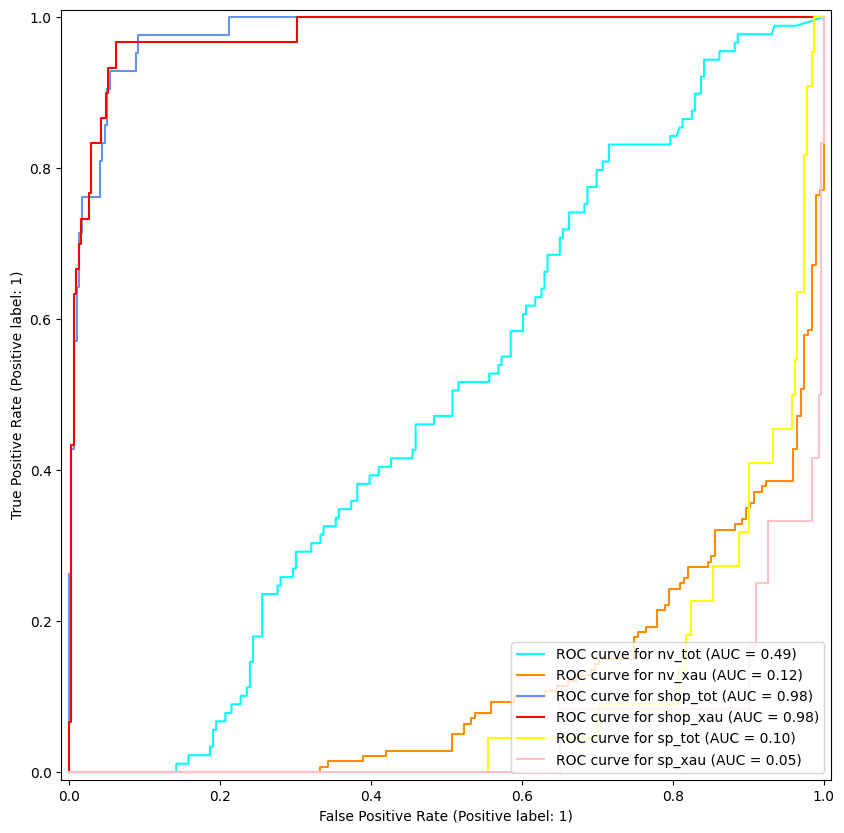

In [18]:
def ROC_curve_SVC(svc, X_test, y_test, class_names):
    predicted_proba = svc.predict_proba(X_test)
    target = label_binarize(y_test,
                        classes=pd.unique(y_test))
    fig, ax = plt.subplots(figsize=(10, 10))
    colors = cycle(["aqua", "darkorange", "cornflowerblue", "red", "yellow", "pink"])
    for class_id, color in zip(range(len(pd.unique(df['label']))), colors):
        RocCurveDisplay.from_predictions(
            target[:, class_id],
            predicted_proba [:, class_id],
            name=f"ROC curve for {class_names[class_id]}",
            color=color,
            ax=ax,
        )
    

ROC_curve_SVC(clf2, val_texts, val_labels, CLASS_NAMES)

# 12. Confusion matrix

Confusion matrix, without normalization
[[ 10   1   1   0   0   0]
 [  0  18   1   1   1   1]
 [  1   2  28   0  10   1]
 [  0   1   1  15   5   8]
 [  0   0   2   0 136   2]
 [  0   0   1   0  14  74]]
Normalized confusion matrix
[[0.83333333 0.08333333 0.08333333 0.         0.         0.        ]
 [0.         0.81818182 0.04545455 0.04545455 0.04545455 0.04545455]
 [0.02380952 0.04761905 0.66666667 0.         0.23809524 0.02380952]
 [0.         0.03333333 0.03333333 0.5        0.16666667 0.26666667]
 [0.         0.         0.01428571 0.         0.97142857 0.01428571]
 [0.         0.         0.01123596 0.         0.15730337 0.83146067]]


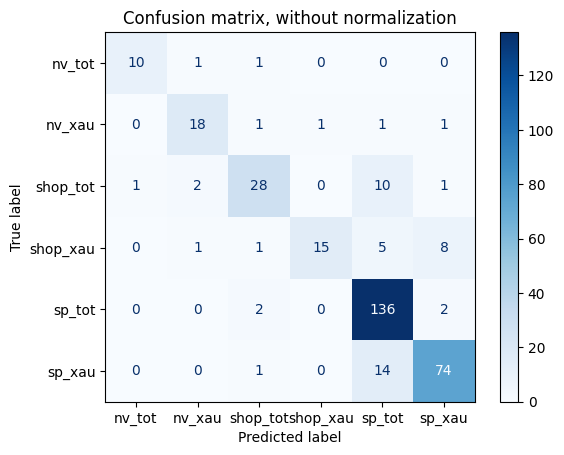

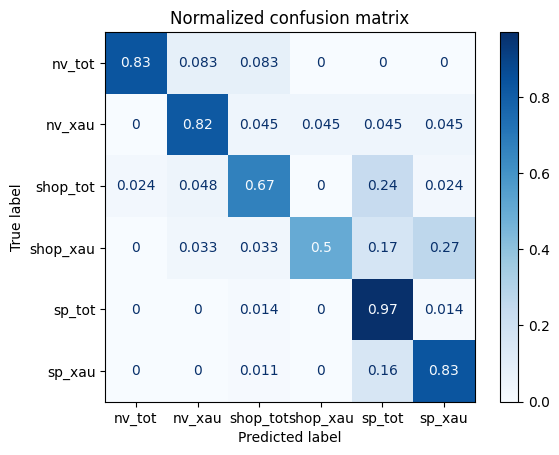

In [19]:
def confusion_matrix_svc(clf2, X_test, y_test, class_names):
    titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            clf2,
            X_test,
            y_test,
            display_labels=class_names,
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)
    
        print(title)
        print(disp.confusion_matrix)
    
    plt.show()

confusion_matrix_svc(clf2, val_texts, val_labels, CLASS_NAMES)

# 13. Save model

In [20]:
with open('model_rf.model','wb') as f:
    pickle.dump(grid_search,f)